## 1. In Situ Hybridization (ISH) Data Portal

The main web portal to access gene expression data, injection and target structures, experiments, expression summaries, expression visualisations (through online or offline version of 3D BrainExplorer tool), etc is https://mouse.brain-map.org/

[This page](http://help.brain-map.org/display/mousebrain/In+Situ+Hybridization+%28ISH%29+Data) provides explanation of different functions available with the search. It covers [the syntax for search queries](http://help.brain-map.org/display/mousebrain/In+Situ+Hybridization+%28ISH%29+Data#InSituHybridization(ISH)Data-BooleanSyntaxQuery), [starting search from brain structures (Differential Search)](http://help.brain-map.org/display/mousebrain/In+Situ+Hybridization+%28ISH%29+Data#InSituHybridization(ISH)Data-DifferentialSearch) to find what genes they express, comparison to [human microarray datasets (Human Differential Search)](http://help.brain-map.org/display/mousebrain/In+Situ+Hybridization+%28ISH%29+Data#InSituHybridization(ISH)Data-HumanDifferentialSearch).

Exploring genes with similar expression patterns to those queried is possible with [the Corrlative Search](http://help.brain-map.org/display/mousebrain/In+Situ+Hybridization+%28ISH%29+Data#InSituHybridization(ISH)Data-CorrelativeSearch). Once you click on an experiment, a panel to the right appears, which gives access to it.

Details on [experimental detail](http://help.brain-map.org/display/mousebrain/In+Situ+Hybridization+%28ISH%29+Data#InSituHybridization(ISH)Data-ExperimentalDetail) and [image viewer](http://help.brain-map.org/display/mousebrain/In+Situ+Hybridization+%28ISH%29+Data#InSituHybridization(ISH)Data-ExperimentalDetail) are also available.

## 2. Accessing the data through the API

### 2.1 Overview of experiments and reference spaces

The overview of ISH data available through API is given here: http://help.brain-map.org/display/mousebrain/API

### 2.2. RESTful Model Access (RMA)

Gene expression, along with many other data types, are provided through [RMA queries](http://help.brain-map.org/pages/viewpage.action?pageId=5308449). Output provided as _JSON_, _XML_ or _CSV_, it can be parsed accordingly to the format. In essence, RMA queries are URL addresses that can be simply pasted into a browser.

For example, looking up metadata on a particular gene:

http://api.brain-map.org/api/v2/data/query.xml?include=model::Gene[id$eq15]

Other examples of queries can be found [here](http://help.brain-map.org/display/api/Example+Queries+for+Experiment+Metadata).

### 2.3. Accessing RMA through Web App

A very convenient way to contruct and test RMA queries (and recommended to understand how they work) is the web [RMA Query Builder Utility](http://api.brain-map.org/examples/rma_builder/rma_builder.html).

To use it:
- select output format
- add "Model" stage
- enter desired parameters
- press "Build Query"

Key parameter to choose is "Model", corresponding to the type of data/metadata/information queried (there are many). Options relevant to this project are "[SectionDataSet](http://api.brain-map.org/api/v2/data/query.xml?criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eqMouse],genes[acronym$eqDrd1],rma::include,structure_unionizes)" (list of experiments for a gene + expression data in unionized format for each experiment) and "[StructureLookup](http://api.brain-map.org/api/v2/data/query.xml?criteria=model::StructureLookup,rma::criteria,structure[id$eq15566],rma::include,structure,rma::options[only$eq%27structure_lookups.structure_id_path,structure_lookups.termtype%27])" (retrieves metadata of brain structures, hierarchical relationships).

Then, there are "criteria" for selection of data. For example, to look up a particular structure, one will want to specify its id. This is done by selecting the category of criteria from drop down list and pressing "[]" to select criterion type (e.g. id) and what it should be equal to (or >, <, etc). Pressing "," allows to add more criteria.

In the "include" option, the overall kind of data to be queried is specificed. In "only" and "except" options, desired data fields to be included in _JSON/XML/CSV_ are further specified.

Hierarchical relationships between "Model" classes in RMA API are available [here](http://api.brain-map.org/class_hierarchy).

### 2.4. Accessing RMA through Python

A short guide to working with RMA API in Python is shown [here](https://alleninstitute.github.io/AllenSDK/data_api_client.html). First step after the [installation](https://allensdk.readthedocs.io/en/latest/install.html) is importing _RmaApi_:

In [1]:
from allensdk.api.queries.rma_api import RmaApi
import pandas as pd
import numpy as np

Using the [model_query_ method](https://alleninstitute.github.io/AllenSDK/allensdk.api.queries.rma_api.html#allensdk.api.queries.rma_api.RmaApi.model_query) from _RmaApi_ and specifying the parameters, it is possible to extract list of experiments for a gene and display it as _Pandas_ data frame:

In [2]:
rma = RmaApi()

gene = "Drd1"
        
data = rma.model_query('SectionDataSet', criteria="products[abbreviation$eq'Mouse'],genes[acronym$eq'"+gene+"'],probes[orientation_id$eq2]",
                      include="probes(orientation),structure_unionizes")

data_df = pd.DataFrame(data)

data_df.head()

,blue_channel,delegate,expression,failed,failed_facet,green_channel,id,name,plane_of_section_id,qc_date,red_channel,reference_space_id,rnaseq_design_id,section_thickness,specimen_id,sphinx_id,storage_directory,weight,probes,structure_unionizes
0,None,True,True,False,734881840,None,71307280,None,2,2009-05-02T22:56:37Z,None,10,None,25.0,70429761,150678,/external/aibssan/production32/prod334/image_s...,5470,"[{'ar_association_key_name': '71307280', 'dele...","[{'expression_density': 0.0159272, 'expression..."
1,None,False,False,False,734881840,None,352,None,1,None,None,9,None,25.0,702565,78451,/external/mouse/prod1/image_series_352/,5470,"[{'ar_association_key_name': '352', 'delegate'...","[{'expression_density': 0.0136562, 'expression..."
2,None,False,False,False,734881840,None,353,None,2,None,None,10,None,25.0,702529,76510,/external/mouse/prod1/image_series_353/,5470,"[{'ar_association_key_name': '352', 'delegate'...","[{'expression_density': 0.00817143, 'expressio..."


To look up the experiments with useful (Antisense) signal, relevant fields can be selected from the data frame:

In [3]:
print(data_df[data_df['id']==352]['probes'].item()[0]['orientation'])

{'id': 2, 'name': 'Antisense'}


Sense has orientation id = 1 and Antisense has orientation id = 2, which can be used to select appropriate experiments (as above).

*"probes[orientation_id$eq2]"* in "criteria" section of the RMA query specifies that.

### 2.5. Unionized data format

In the data frame above, experiment ids are in "id" column and the unionized data is in the "structure_unionizes". The content of "structure_unionizes" column are lists with dictionaries, which themselves can be turned into data frames:

In [4]:
experiment_id = 353

exp_union_data = pd.DataFrame(data_df[data_df['id']==experiment_id]['structure_unionizes'].item())

exp_union_data.head()

,expression_density,expression_energy,id,section_data_set_id,structure_id,sum_expressing_pixel_intensity,sum_expressing_pixels,sum_pixel_intensity,sum_pixels,voxel_energy_cv,voxel_energy_mean
0,0.008171,1.097120,398484594,353,15564,1.247590e+09,9292150.0,2.520100e+10,1.137150e+09,2.65761,1.096010
1,0.008171,1.097120,398484597,353,15565,1.247590e+09,9292150.0,2.520100e+10,1.137150e+09,2.65761,1.096010
2,0.010952,1.481770,398484604,353,15566,1.148940e+09,8491790.0,1.678110e+10,7.753830e+08,2.32817,1.481180
3,0.012336,1.672050,398484612,353,15567,1.135570e+09,8378020.0,1.474800e+10,6.791490e+08,2.18009,1.671290
4,0.000695,0.087989,398484614,353,15568,2.630740e+06,20770.7,4.662790e+08,2.989850e+07,2.34418,0.087989


As explained [here](http://help.brain-map.org/display/mousebrain/API#API-Expression3DGridsExpressionGridding), expression density, intensity and energy are interconnected in the following way:

In [5]:
single_structure_df = exp_union_data[exp_union_data['structure_id']==15564]

expression_density = single_structure_df['expression_density'].item()
expression_energy = single_structure_df['expression_energy'].item()

sum_expressing_pixel_intensity = single_structure_df['sum_expressing_pixel_intensity'].item()
sum_pixel_intensity = single_structure_df['sum_pixel_intensity'].item()

sum_expressing_pixels = single_structure_df['sum_expressing_pixels'].item()
sum_pixels = single_structure_df['sum_pixels'].item()

expression_intensity = sum_expressing_pixel_intensity / sum_expressing_pixels

print(expression_intensity * expression_density)
print(expression_energy)

1.0971190040733307
1.09712


One can easily obtain the data above (expression density/energy and manually calculate intensity) for a particular brain structure. Here is an example of using RMA query to look up the parent of the structure with id = 15568 and retrieving its expression density:

In [6]:
# Function to make the RMA query

def query_id_path(s_id):
    query = rma.model_query('StructureLookup', criteria="structure[id$eq"+str(s_id)+"]",include="structure",
        options="[only$eq'structure_lookups.termtype,structure_lookups.structure_id_path']")[0]
    return query

In [7]:
query = query_id_path(15568)

print("Query contents:")
print(query)

Query contents:
{'id': 4259, 'ontology_id': 12, 'structure_id': 15568, 'term': 'RSP', 'termtype': 'a', 'structure': {'acronym': 'RSP', 'atlas_id': None, 'color_hex_triplet': 'A84D10', 'depth': 4, 'failed': False, 'failed_facet': 734881840, 'graph_id': 17, 'graph_order': 4, 'hemisphere_id': 3, 'id': 15568, 'name': 'rostral secondary prosencephalon', 'neuro_name_structure_id': None, 'neuro_name_structure_id_path': None, 'ontology_id': 12, 'parent_structure_id': 15567, 'safe_name': 'rostral secondary prosencephalon', 'sphinx_id': 9921, 'st_level': 3, 'structure_id_path': '/15564/15565/15566/15567/15568/', 'structure_name_facet': 2675393843, 'weight': 8390}}


Its id path is "/15564/15565/15566/15567/15568/". It specifies the hierarchical sequence of structures, starting from its parent (15567) and above. These paths can be different depending on the structure set adopted.

In [8]:
print("expression density =", exp_union_data[exp_union_data['structure_id']==15567]['expression_density'].item())

expression density = 0.0123361


### 2.6. Alternative approach of accessing expression data

It can be reached by through [GridDataApi](https://allensdk.readthedocs.io/en/latest/allensdk.api.queries.grid_data_api.html). The type of data provided is explained [here](http://help.brain-map.org/display/api/Downloading+3-D+Expression+Grid+Data). This API allows downloading projection data as well.

In [9]:
from allensdk.api.queries.grid_data_api import GridDataApi
gda = GridDataApi()

# This downloads to local computer
# gda.download_gene_expression_grid_data(352, GridDataApi.INTENSITY, '/home/ikharitonov/Desktop/')

## 3. Understanding brain structure divisions and hierarchical sets

There are many structural sets used in Allen Atlases. Their levels of coarseness are different. This is the list of main structure sets:

In [10]:
from allensdk.api.queries.ontologies_api import OntologiesApi
pd.set_option("display.max_rows", None, "display.max_columns", None)

oapi = OntologiesApi()
pd.DataFrame(oapi.get_structure_sets())

,description,id,name
0,List of structures in Isocortex layer 5,667481446,Isocortex layer 5
1,List of structures in Isocortex layer 6b,667481450,Isocortex layer 6b
2,Summary structures of the cerebellum,688152368,Cerebellum
3,List of structures representing a coarse level...,8,NHP - Coarse
4,List of structures sampled for BrainSpan Trans...,7,Developing Human - Transcriptome
5,list of characteristic glioblastoma tumor elem...,306997241,GBM - Tumor Features
6,List of structures for ABA Differential Search,12,ABA - Differential Search
7,List of valid structures for projection target...,184527634,Mouse Connectivity - Target Search
8,Structures whose surfaces are represented by a...,691663206,Mouse Brain - Has Surface Mesh
9,Summary structures of the midbrain,688152365,Midbrain


Structures within the set can be accessed through the [get_structures_by_set_id](https://allensdk.readthedocs.io/en/latest/allensdk.core.structure_tree.html#allensdk.core.structure_tree.StructureTree.get_structures_by_set_id) method from [StructureTree](https://allensdk.readthedocs.io/en/latest/allensdk.core.structure_tree.html) in [MouseConnectivityCache](https://allensdk.readthedocs.io/en/latest/allensdk.core.mouse_connectivity_cache.html) or using the "Structure" model in RMA query:

In [11]:
def display_structure_set(structure_set_id):
    df = pd.DataFrame(rma.model_query('Structure', criteria="structure_sets[id$eq"+str(structure_set_id)+"]", start_row=0, num_rows='all')).sort_values("graph_order")
    print(len(df),"rows")
    # as in https://github.com/pandas-dev/pandas/issues/33606
    return df.style.set_table_styles([{'selector': 'thead th', 'props': 'position: sticky; top:0; background-color:lightgreen;'}])

Below are some of the relevant structure sets which include visual areas.

In [12]:
print("All mouse visual areas with layers")
print("ID",str(396673091))
df = display_structure_set(396673091)
df

All mouse visual areas with layers
ID 396673091
70 rows


,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,name,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
15,VISal,757.000000,08858C,7,False,734881840,1,164,3,402,Anterolateral visual area,None,None,1,669,Anterolateral visual area,165,8,/997/8/567/688/695/315/669/402/,1250787960,8690
23,VISal1,1124.000000,08858C,8,False,734881840,1,165,3,1074,"Anterolateral visual area, layer 1",None,None,1,402,Anterolateral visual area layer 1,166,11,/997/8/567/688/695/315/669/402/1074/,2830003304,8690
19,VISal2/3,1103.000000,08858C,8,False,734881840,1,166,3,905,"Anterolateral visual area, layer 2/3",None,None,1,402,Anterolateral visual area layer 2/3,167,11,/997/8/567/688/695/315/669/402/905/,125014447,8690
60,VISal4,1129.000000,08858C,8,False,734881840,1,167,3,1114,"Anterolateral visual area, layer 4",None,None,1,402,Anterolateral visual area layer 4,168,11,/997/8/567/688/695/315/669/402/1114/,3636762855,8690
61,VISal5,453.000000,08858C,8,False,734881840,1,168,3,233,"Anterolateral visual area, layer 5",None,None,1,402,Anterolateral visual area layer 5,169,11,/997/8/567/688/695/315/669/402/233/,2948835441,8690
3,VISal6a,1065.000000,08858C,8,False,734881840,1,169,3,601,"Anterolateral visual area, layer 6a",None,None,1,402,Anterolateral visual area layer 6a,170,11,/997/8/567/688/695/315/669/402/601/,3828838274,8690
32,VISal6b,1071.000000,08858C,8,False,734881840,1,170,3,649,"Anterolateral visual area, layer 6b",None,None,1,402,Anterolateral visual area layer 6b,171,11,/997/8/567/688/695/315/669/402/649/,2101231160,8690
53,VISam,756.000000,08858C,7,False,734881840,1,171,3,394,Anteromedial visual area,None,None,1,669,Anteromedial visual area,172,8,/997/8/567/688/695/315/669/394/,1045871632,8690
24,VISam1,1025.000000,08858C,8,False,734881840,1,172,3,281,"Anteromedial visual area, layer 1",None,None,1,394,Anteromedial visual area layer 1,173,11,/997/8/567/688/695/315/669/394/281/,660054922,8690
17,VISam2/3,1123.000000,08858C,8,False,734881840,1,173,3,1066,"Anteromedial visual area, layer 2/3",None,None,1,394,Anteromedial visual area layer 2/3,174,11,/997/8/567/688/695/315/669/394/1066/,1625313305,8690


In [13]:
print("List of visual cortex structures targeted for visual coding experiments")
print("ID",str(514166994))
df = display_structure_set(514166994)
df

List of visual cortex structures targeted for visual coding experiments
ID 514166994
7 rows


,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,name,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
6,VISal,757.000000,08858C,7,False,734881840,1,164,3,402,Anterolateral visual area,None,None,1,669,Anterolateral visual area,165,8,/997/8/567/688/695/315/669/402/,1250787960,8690
3,VISam,756.000000,08858C,7,False,734881840,1,171,3,394,Anteromedial visual area,None,None,1,669,Anteromedial visual area,172,8,/997/8/567/688/695/315/669/394/,1045871632,8690
4,VISl,758.000000,08858C,7,False,734881840,1,178,3,409,Lateral visual area,None,None,1,669,Lateral visual area,179,8,/997/8/567/688/695/315/669/409/,1805245805,8690
1,VISp,755.000000,08858C,7,False,734881840,1,185,3,385,Primary visual area,None,None,1,669,Primary visual area,186,8,/997/8/567/688/695/315/669/385/,3425643282,8690
5,VISpm,915.000000,08858C,7,False,734881840,1,199,3,533,posteromedial visual area,None,None,1,669,posteromedial visual area,200,8,/997/8/567/688/695/315/669/533/,558797901,8690
0,VISli,nan,08858C,7,False,734881840,1,206,3,312782574,Laterointermediate area,None,None,1,669,Laterointermediate area,207,8,/997/8/567/688/695/315/669/312782574/,2157470672,8690
2,VISrl,759.000000,009FAC,7,False,734881840,1,353,3,417,Rostrolateral visual area,None,None,1,22,Rostrolateral visual area,354,8,/997/8/567/688/695/315/22/417/,1848950861,8690


In [14]:
print("List of structures in Isocortex layer 5")
print("ID",str(667481446))
df = display_structure_set(667481446)
df

List of structures in Isocortex layer 5
ID 667481446
43 rows


,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,name,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
7,FRP5,nan,268F45,7,False,734881840,1,9,3,526157192,"Frontal pole, layer 5",None,None,1,184,Frontal pole layer 5,10,11,/997/8/567/688/695/315/184/526157192/,1413248090,8690
1,MOp5,929.000000,1F9D5A,8,False,734881840,1,21,3,648,"Primary motor area, Layer 5",None,None,1,985,Primary motor area Layer 5,22,11,/997/8/567/688/695/315/500/985/648/,628930507,8690
17,MOs5,944.000000,1F9D5A,8,False,734881840,1,27,3,767,"Secondary motor area, layer 5",None,None,1,993,Secondary motor area layer 5,28,11,/997/8/567/688/695/315/500/993/767/,4144803096,8690
0,SSp-n5,653.000000,188064,9,False,734881840,1,48,3,702,"Primary somatosensory area, nose, layer 5",None,None,1,353,Primary somatosensory area nose layer 5,49,11,/997/8/567/688/695/315/453/322/353/702/,4022406278,8690
18,SSp-bfd5,982.000000,188064,9,False,734881840,1,55,3,1070,"Primary somatosensory area, barrel field, layer 5",None,None,1,329,Primary somatosensory area barrel field layer 5,56,11,/997/8/567/688/695/315/453/322/329/1070/,3120758187,8690
4,SSp-ll5,989.000000,188064,9,False,734881840,1,69,3,1128,"Primary somatosensory area, lower limb, layer 5",None,None,1,337,Primary somatosensory area lower limb layer 5,70,11,/997/8/567/688/695/315/453/322/337/1128/,1995492342,8690
38,SSp-m5,970.000000,188064,9,False,734881840,1,76,3,974,"Primary somatosensory area, mouth, layer 5",None,None,1,345,Primary somatosensory area mouth layer 5,77,11,/997/8/567/688/695/315/453/322/345/974/,3102678536,8690
24,SSp-ul5,1068.000000,188064,9,False,734881840,1,83,3,625,"Primary somatosensory area, upper limb, layer 5",None,None,1,369,Primary somatosensory area upper limb layer 5,84,11,/997/8/567/688/695/315/453/322/369/625/,2356862430,8690
28,SSp-tr5,987.000000,188064,9,False,734881840,1,90,3,1111,"Primary somatosensory area, trunk, layer 5",None,None,1,361,Primary somatosensory area trunk layer 5,91,11,/997/8/567/688/695/315/453/322/361/1111/,281768908,8690
8,SSp-un5,nan,188064,9,False,734881840,1,97,3,182305705,"Primary somatosensory area, unassigned, layer 5",None,None,1,182305689,Primary somatosensory area unassigned layer 5,98,11,/997/8/567/688/695/315/453/322/182305689/182305705/,1806412353,8690


In [24]:
print("Curated list of non-overlapping substructures at a mid-ontology level")
print("ID",str(167587189))
df = display_structure_set(167587189)
df

Curated list of non-overlapping substructures at a mid-ontology level
ID 167587189
316 rows


,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,name,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
46,FRP,871.000000,268F45,6,False,734881840,1,6,3,184,"Frontal pole, cerebral cortex",None,None,1,315,Frontal pole cerebral cortex,7,8,/997/8/567/688/695/315/184/,2565719060,8690
32,MOp,830.000000,1F9D5A,7,False,734881840,1,18,3,985,Primary motor area,None,None,1,500,Primary motor area,19,8,/997/8/567/688/695/315/500/985/,1852742012,8690
158,MOs,831.000000,1F9D5A,7,False,734881840,1,24,3,993,Secondary motor area,None,None,1,500,Secondary motor area,25,8,/997/8/567/688/695/315/500/993/,1043755260,8690
61,SSp-n,751.000000,188064,8,False,734881840,1,44,3,353,"Primary somatosensory area, nose",None,None,1,322,Primary somatosensory area nose,45,9,/997/8/567/688/695/315/453/322/353/,3014838097,8690
311,SSp-bfd,748.000000,188064,8,False,734881840,1,51,3,329,"Primary somatosensory area, barrel field",None,None,1,322,Primary somatosensory area barrel field,52,9,/997/8/567/688/695/315/453/322/329/,3406319794,8690
253,SSp-ll,749.000000,188064,8,False,734881840,1,65,3,337,"Primary somatosensory area, lower limb",None,None,1,322,Primary somatosensory area lower limb,66,9,/997/8/567/688/695/315/453/322/337/,533428449,8690
122,SSp-m,750.000000,188064,8,False,734881840,1,72,3,345,"Primary somatosensory area, mouth",None,None,1,322,Primary somatosensory area mouth,73,9,/997/8/567/688/695/315/453/322/345/,2638278704,8690
67,SSp-ul,753.000000,188064,8,False,734881840,1,79,3,369,"Primary somatosensory area, upper limb",None,None,1,322,Primary somatosensory area upper limb,80,9,/997/8/567/688/695/315/453/322/369/,3184285306,8690
47,SSp-tr,752.000000,188064,8,False,734881840,1,86,3,361,"Primary somatosensory area, trunk",None,None,1,322,Primary somatosensory area trunk,87,9,/997/8/567/688/695/315/453/322/361/,2078745056,8690
87,SSp-un,nan,188064,8,False,734881840,1,93,3,182305689,"Primary somatosensory area, unassigned",None,None,1,322,Primary somatosensory area unassigned,94,9,/997/8/567/688/695/315/453/322/182305689/,10092796,8690


## 4. Data mining details

Structure IDs:<br>

VISam5 = 433<br>
VISpm5 = 565<br>
RSPagl5 = 774<br>
VISp5 = 778

All within structure set 667481446, "List of structures in Isocortex layer 5".

Antisense orientation data is treated as signal. Sense is treated as control.

## 5. Plotting distribution of expression values

In [16]:
import matplotlib.pyplot as plt

In [21]:
path = '/home/ikharitonov/Desktop/data/ish/antisense/'

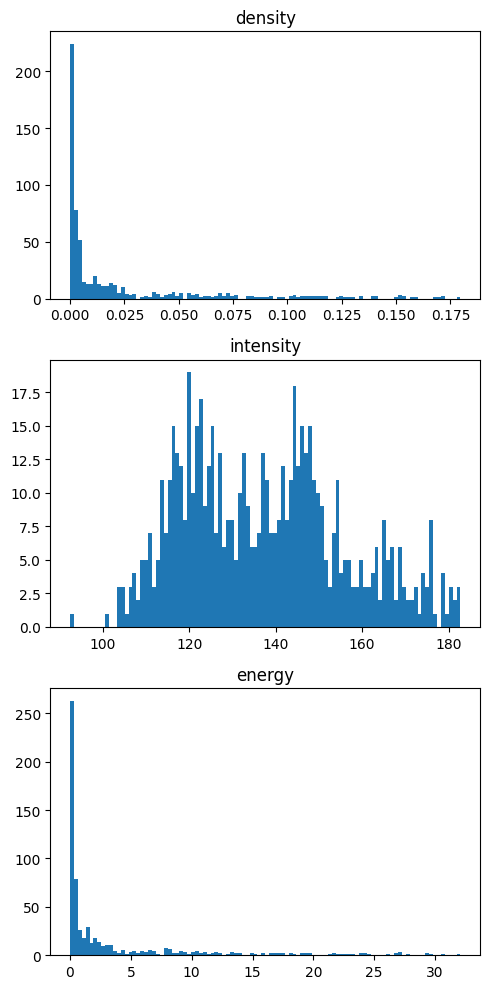

In [22]:
figure, axes = plt.subplots(3,1, figsize=(5,10))

data = pd.read_excel(path+'expression_density_data.xlsx', sheet_name='Full Data')
axes[0].set_title('density')
axes[0].hist(data[data['expression_density']>0]['expression_density'], bins=100)

data = pd.read_excel(path+'expression_intensity_data.xlsx', sheet_name='Full Data')
axes[1].set_title('intensity')
axes[1].hist(data[data['expression_intensity']>0]['expression_intensity'], bins=100)

data = pd.read_excel(path+'expression_energy_data.xlsx', sheet_name='Full Data')
axes[2].set_title('energy')
axes[2].hist(data[data['expression_energy']>0]['expression_energy'], bins=100)

plt.tight_layout()
plt.show()

## 6. ISH data for V2m inputs

RSP, ACC, ORB

In [27]:
display_structure_set(687527945)

293 rows


,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,name,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
44,FRP,871.000000,268F45,6,False,734881840,1,6,3,184,"Frontal pole, cerebral cortex",None,None,1,315,Frontal pole cerebral cortex,7,8,/997/8/567/688/695/315/184/,2565719060,8690
32,MOp,830.000000,1F9D5A,7,False,734881840,1,18,3,985,Primary motor area,None,None,1,500,Primary motor area,19,8,/997/8/567/688/695/315/500/985/,1852742012,8690
145,MOs,831.000000,1F9D5A,7,False,734881840,1,24,3,993,Secondary motor area,None,None,1,500,Secondary motor area,25,8,/997/8/567/688/695/315/500/993/,1043755260,8690
58,SSp-n,751.000000,188064,8,False,734881840,1,44,3,353,"Primary somatosensory area, nose",None,None,1,322,Primary somatosensory area nose,45,9,/997/8/567/688/695/315/453/322/353/,3014838097,8690
288,SSp-bfd,748.000000,188064,8,False,734881840,1,51,3,329,"Primary somatosensory area, barrel field",None,None,1,322,Primary somatosensory area barrel field,52,9,/997/8/567/688/695/315/453/322/329/,3406319794,8690
233,SSp-ll,749.000000,188064,8,False,734881840,1,65,3,337,"Primary somatosensory area, lower limb",None,None,1,322,Primary somatosensory area lower limb,66,9,/997/8/567/688/695/315/453/322/337/,533428449,8690
113,SSp-m,750.000000,188064,8,False,734881840,1,72,3,345,"Primary somatosensory area, mouth",None,None,1,322,Primary somatosensory area mouth,73,9,/997/8/567/688/695/315/453/322/345/,2638278704,8690
64,SSp-ul,753.000000,188064,8,False,734881840,1,79,3,369,"Primary somatosensory area, upper limb",None,None,1,322,Primary somatosensory area upper limb,80,9,/997/8/567/688/695/315/453/322/369/,3184285306,8690
45,SSp-tr,752.000000,188064,8,False,734881840,1,86,3,361,"Primary somatosensory area, trunk",None,None,1,322,Primary somatosensory area trunk,87,9,/997/8/567/688/695/315/453/322/361/,2078745056,8690
82,SSp-un,nan,188064,8,False,734881840,1,93,3,182305689,"Primary somatosensory area, unassigned",None,None,1,322,Primary somatosensory area unassigned,94,9,/997/8/567/688/695/315/453/322/182305689/,10092796,8690


In [28]:
ACAd = 39
ACAv = 48

ORBl = 723
ORBm = 731
ORBvl = 746

RSPagl = 894
RSPd = 879
RSPv = 886

In [29]:
path = '/home/ikharitonov/Desktop/data/ish/v2m_inputs_antisense/'

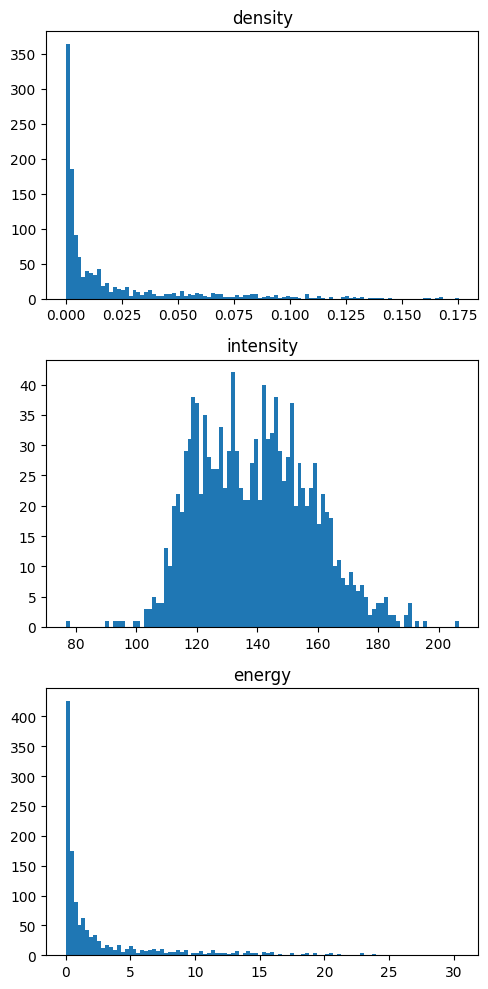

In [30]:
figure, axes = plt.subplots(3,1, figsize=(5,10))

data = pd.read_excel(path+'expression_density_data.xlsx', sheet_name='Full Data')
axes[0].set_title('density')
axes[0].hist(data[data['expression_density']>0]['expression_density'], bins=100)

data = pd.read_excel(path+'expression_intensity_data.xlsx', sheet_name='Full Data')
axes[1].set_title('intensity')
axes[1].hist(data[data['expression_intensity']>0]['expression_intensity'], bins=100)

data = pd.read_excel(path+'expression_energy_data.xlsx', sheet_name='Full Data')
axes[2].set_title('energy')
axes[2].hist(data[data['expression_energy']>0]['expression_energy'], bins=100)

plt.tight_layout()
plt.show()